In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer,confusion_matrix,plot_confusion_matrix


/Users/admin/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.drop(columns=['customerID'],inplace=True)

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
df.loc[(df['TotalCharges']==' '),'TotalCharges']=0

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [21]:
df.replace(" ","_",regex=True,inplace=True)

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [25]:
df['Churn']  = df['Churn'].map({"No":0,"Yes":1})

In [26]:
X = df.drop(columns=['Churn'],axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65


In [27]:
y = df['Churn']

In [32]:
cat_cols = X.select_dtypes(include='object').columns.values
X_encoded = pd.get_dummies(X,columns=cat_cols)

In [34]:
X_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42,stratify=y)

In [38]:
clf = xgb.XGBClassifier(seed=42)

In [39]:
clf.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.579067
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.581273
[2]	validation_0-aucpr:0.594607
[3]	validation_0-aucpr:0.595215
[4]	validation_0-aucpr:0.596482
[5]	validation_0-aucpr:0.598574
[6]	validation_0-aucpr:0.631769
[7]	validation_0-aucpr:0.638008
[8]	validation_0-aucpr:0.638729
[9]	validation_0-aucpr:0.63937
[10]	validation_0-aucpr:0.63839
[11]	validation_0-aucpr:0.641466
[12]	validation_0-aucpr:0.641945
[13]	validation_0-aucpr:0.641556
[14]	validation_0-aucpr:0.640274
[15]	validation_0-aucpr:0.64372
[16]	validation_0-aucpr:0.645566
[17]	validation_0-aucpr:0.645732
[18]	validation_0-aucpr:0.647367
[19]	validation_0-aucpr:0.64633
[20]	validation_0-aucpr:0.647219
[21]	validation_0-aucpr:0.647022
[22]	validation_0-aucpr:0.647085
[23]	validation_0-aucpr:0.649197
[24]	validation_0-aucpr:0.650565
[25]	validation_0-aucpr:0.649892
[26]	validation_0-aucpr:0.649925
[27]	validation_0-aucpr:0.649745
[28]	validation_0-aucpr:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

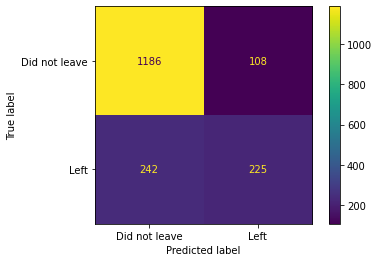

In [42]:
plot_confusion_matrix(clf,X_test,y_test,values_format='d',display_labels=['Did not leave','Left'])

In [45]:
param = {"max_depth":[3,4,5],"learning_rate":[0.1,0.05,0.01],"gamma":[0,0.25,1],
         "reg_lambda":[0,1,10],"scale_pos_weight":[1,3,5]}

optimum_params = GridSearchCV(xgb.XGBClassifier(seed=42,subsample=0.9,colsample_bytree=0.5),
                             param_grid=param,scoring='roc_auc',verbose=0,n_jobs=-1,cv=3)

optimum_params.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)],verbose=False)

print(optimum_params.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10, 'scale_pos_weight': 1}


In [50]:
clf = xgb.XGBClassifier(seed=42,gamma=0,learning_rate=0.1,max_depth=3,reg_lambda=10,scale_pos_weight=1)
clf.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.572442
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.578665
[2]	validation_0-aucpr:0.59182
[3]	validation_0-aucpr:0.592774
[4]	validation_0-aucpr:0.593577
[5]	validation_0-aucpr:0.594089
[6]	validation_0-aucpr:0.627865
[7]	validation_0-aucpr:0.636157
[8]	validation_0-aucpr:0.636317
[9]	validation_0-aucpr:0.6361
[10]	validation_0-aucpr:0.638376
[11]	validation_0-aucpr:0.638313
[12]	validation_0-aucpr:0.64009
[13]	validation_0-aucpr:0.641645
[14]	validation_0-aucpr:0.642855
[15]	validation_0-aucpr:0.643934
[16]	validation_0-aucpr:0.645091
[17]	validation_0-aucpr:0.645587
[18]	validation_0-aucpr:0.64519
[19]	validation_0-aucpr:0.645177
[20]	validation_0-aucpr:0.645032
[21]	validation_0-aucpr:0.644666
[22]	validation_0-aucpr:0.645037
[23]	validation_0-aucpr:0.645382
[24]	validation_0-aucpr:0.645709
[25]	validation_0-aucpr:0.643369
[26]	validation_0-aucpr:0.64742
[27]	validation_0-aucpr:0.64719
[28]	validation_0-aucpr:0.6

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

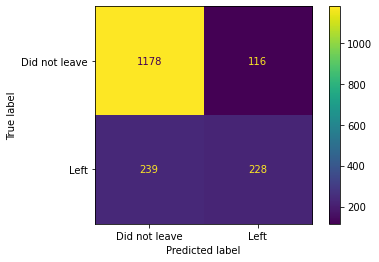

In [51]:
plot_confusion_matrix(clf,X_test,y_test,values_format='d',display_labels=['Did not leave','Left'])

In [52]:
# So model has improved marginally